# GEO3463: Map of sampling at SAMS  (23-25/05/23 Loch Etive and Loch Creran)
This Jupyter program is used to plot a map of the stations sampled in 2023, during module GEO3463.

Code written by Xuerong Sun, adapted by Bob Brewin

### Load function needed for the program

In [1]:
import pandas as pd
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import netCDF4 as nc
from netCDF4 import Dataset
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
import numpy.ma as ma

### Supress warnings (prevents Jupyter printing out warnings....do be careful with this)

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Location of stations

In [3]:
# read lat and lon
re_5_lat, re_5_lon= 56.45505, -5.19037
re_8_lat, re_8_lon = 56.46656, -5.4491
LY0_lat, LY0_lon = 56.46406667, -5.5172
LY1_lat, LY1_lon = 56.478, -5.503816667
LY2_lat, LY2_lon = 56.50391667, -5.4648
LY4_lat, LY4_lon = 56.53046667, -5.435933333
CYLL_lat, CYLL_lon = 56.53941667, -5.403166667
C1_lat, C1_lon = 56.53038333, -5.39735
C2_lat, C2_lon = 56.52161667, -5.388183333
C3_lat, C3_lon = 56.51626667, -5.374716667
C4_lat, C4_lon = 56.52595, -5.346866667
C5_lat, C5_lon = 56.53331667, -5.330233333
C6_lat, C6_lon = 56.54735, -5.304133333

### Elevation data for background

In [4]:
filename = 'GEBCO_2021_subset.nc'
GEBCO = nc.Dataset(filename)
GEBCO_lat = GEBCO.variables['lat'][:]                       
GEBCO_lon = GEBCO.variables['lon'][:]
GEBCO_elevation = GEBCO.variables['elevation'][:]
masked_GEBCO_elevation = ma.masked_array(GEBCO_elevation, mask=(GEBCO_elevation > 0))

### Day 1 Loch Etive

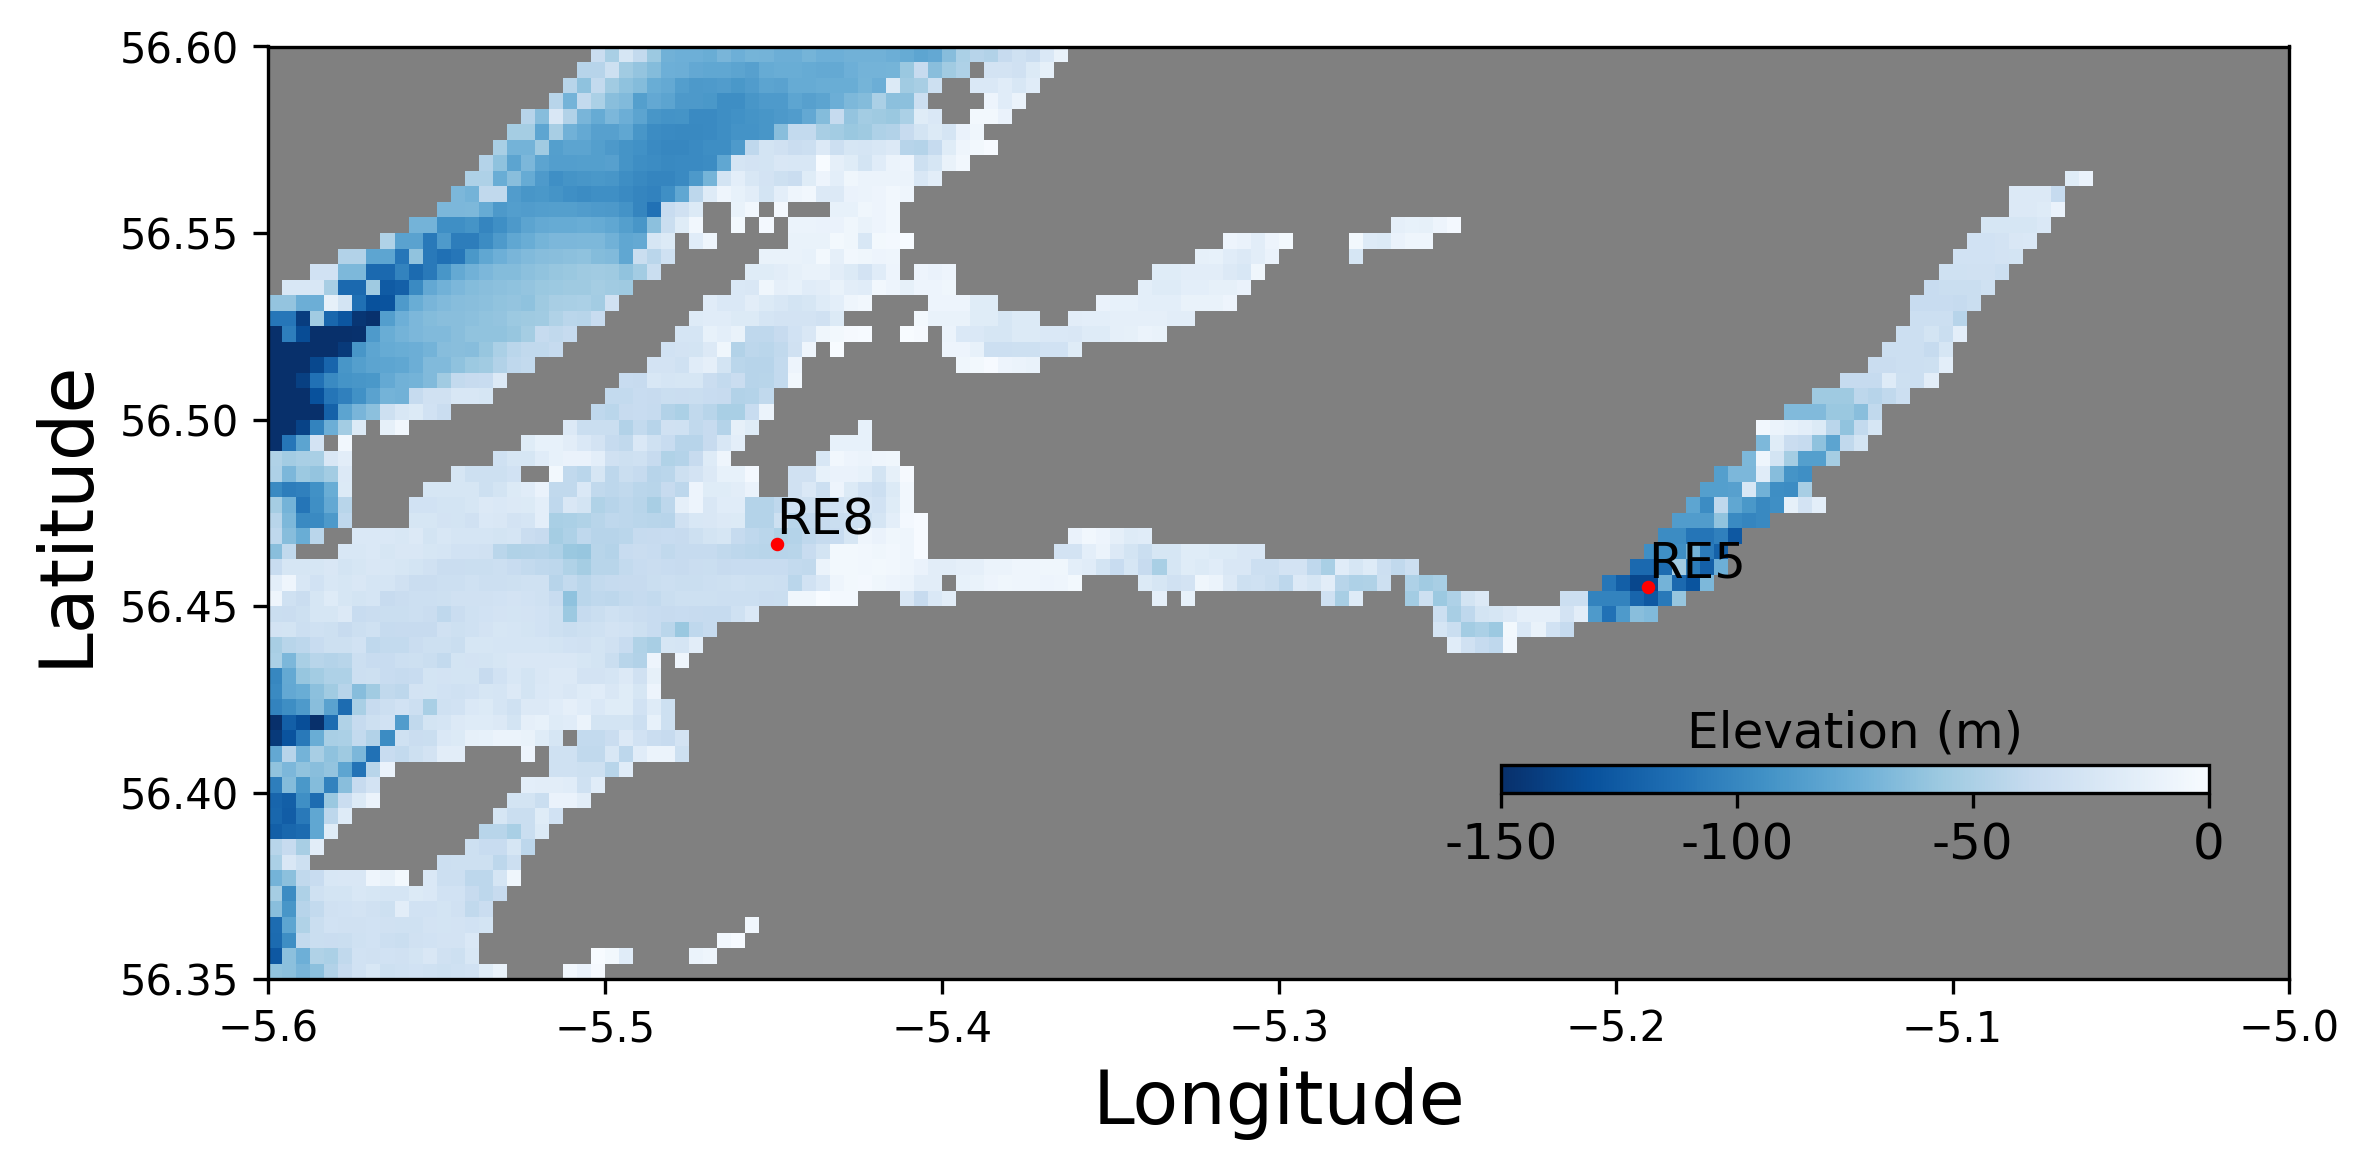

In [5]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(8,4),dpi=300)
# colourmap for elevation
cmap = plt.cm.get_cmap('Blues').reversed()
camp_sd = mpl.cm.get_cmap(cmap)
camp_sd.set_bad(color='grey') # set masked values to white (nan)
norm_sd = mpl.colors.Normalize(vmin=-150, vmax=0) # set boundary of colourbar

ax.pcolormesh(GEBCO_lon,GEBCO_lat,masked_GEBCO_elevation, cmap=camp_sd, norm=norm_sd)
ax.scatter(re_5_lon,re_5_lat,marker='o',c='red',s=5)
ax.scatter(re_8_lon,re_8_lat,marker='o',c='red',s=5)
ax.set_xlim([-5.6, -5.0])
ax.set_ylim([56.35, 56.6])

axins1 = inset_axes(ax,
                    width="35%",  # width = 50% of parent_bbox width
                    height="3%",  # height : 5%
                    loc='lower right',
                    bbox_to_anchor=(-0.04, 0.2, 1, 1), # based on the right corner (bottom right)
                    bbox_transform=ax.transAxes,
                    borderpad=0)

cb = fig.colorbar(mpl.cm.ScalarMappable(cmap=camp_sd, norm=norm_sd), cax=axins1, orientation='horizontal',ticks = [-150,-100,-50,0])
cb.ax.set_xticklabels(['-150','-100','-50','0']) 
cb.set_label(label='Elevation (m)', fontsize = 12)
cb.ax.xaxis.set_ticks_position('bottom')
cb.ax.xaxis.set_label_position('top')
cb.ax.tick_params(labelsize=12)
ax.set_ylabel('Latitude', fontsize = 18)
ax.set_xlabel('Longitude', fontsize = 18)
ax.text(re_5_lon, re_5_lat, 'RE5', fontsize=12, va='bottom')
ax.text(re_8_lon, re_8_lat, 'RE8', fontsize=12, va='bottom')

fig.tight_layout()

#IF YOU WANT TO SAVE THE IMAGE TO YOUR FOLDER UNCOMMENT THIS LINE
#fig.savefig('Loch_Etive', dpi = 300)

### Day 2 Loch Creran

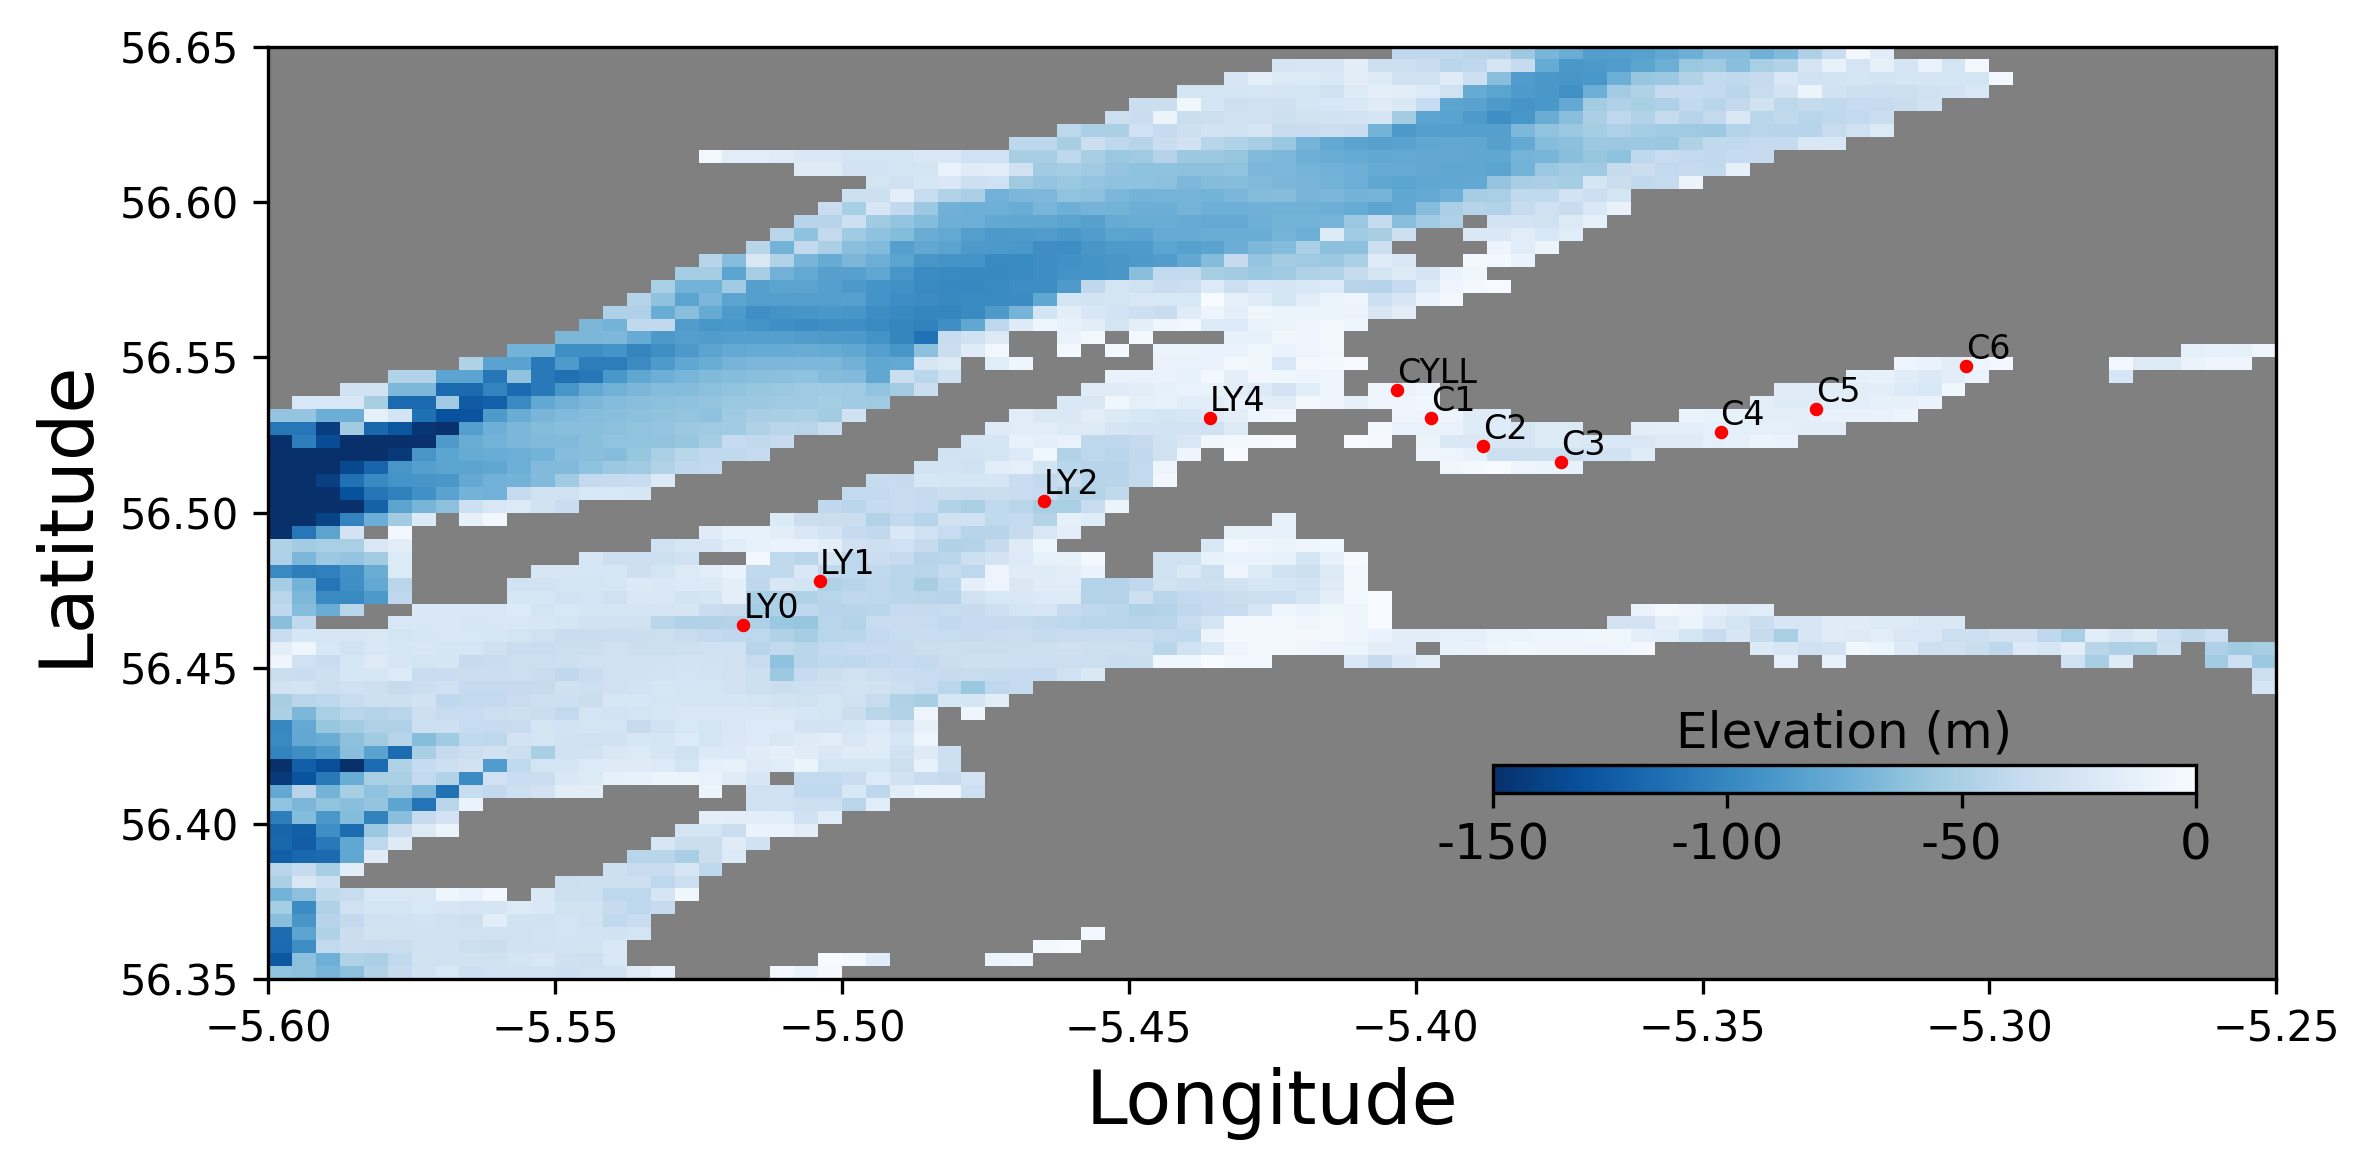

In [6]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(8,4),dpi=300)
# colourmap for elevation
cmap = plt.cm.get_cmap('Blues').reversed()
camp_sd = mpl.cm.get_cmap(cmap)
camp_sd.set_bad(color='grey') # set masked values to white (nan)
norm_sd = mpl.colors.Normalize(vmin=-150, vmax=0) # set boundary of colourbar

ax.pcolormesh(GEBCO_lon,GEBCO_lat,masked_GEBCO_elevation, cmap=camp_sd, norm=norm_sd)
ax.scatter(LY0_lon,LY0_lat,marker='o',c='red',s=5)
ax.scatter(LY1_lon,LY1_lat,marker='o',c='red',s=5)
ax.scatter(LY2_lon,LY2_lat,marker='o',c='red',s=5)
ax.scatter(LY4_lon,LY4_lat,marker='o',c='red',s=5)
ax.scatter(CYLL_lon,CYLL_lat,marker='o',c='red',s=5)
ax.scatter(C1_lon,C1_lat,marker='o',c='red',s=5)
ax.scatter(C2_lon,C2_lat,marker='o',c='red',s=5)
ax.scatter(C3_lon,C3_lat,marker='o',c='red',s=5)
ax.scatter(C4_lon,C4_lat,marker='o',c='red',s=5)
ax.scatter(C5_lon,C5_lat,marker='o',c='red',s=5)
ax.scatter(C6_lon,C6_lat,marker='o',c='red',s=5)
ax.set_xlim([-5.6, -5.25])
ax.set_ylim([56.35, 56.65])

axins1 = inset_axes(ax,
                    width="35%",  # width = 50% of parent_bbox width
                    height="3%",  # height : 5%
                    loc='lower right',
                    bbox_to_anchor=(-0.04, 0.2, 1, 1), # based on the right corner (bottom right)
                    bbox_transform=ax.transAxes,
                    borderpad=0)

cb = fig.colorbar(mpl.cm.ScalarMappable(cmap=camp_sd, norm=norm_sd), cax=axins1, orientation='horizontal',ticks = [-150,-100,-50,0])
cb.ax.set_xticklabels(['-150','-100','-50','0']) 
cb.set_label(label='Elevation (m)', fontsize = 12)
cb.ax.xaxis.set_ticks_position('bottom')
cb.ax.xaxis.set_label_position('top')
cb.ax.tick_params(labelsize=12)
ax.set_ylabel('Latitude', fontsize = 18)
ax.set_xlabel('Longitude', fontsize = 18)

ax.text(LY0_lon,LY0_lat, 'LY0', fontsize=8, va='bottom')
ax.text(LY1_lon,LY1_lat, 'LY1', fontsize=8, va='bottom')
ax.text(LY2_lon,LY2_lat, 'LY2', fontsize=8, va='bottom')
ax.text(LY4_lon,LY4_lat, 'LY4', fontsize=8, va='bottom')
ax.text(CYLL_lon,CYLL_lat, 'CYLL', fontsize=8, va='bottom')
ax.text(C1_lon,C1_lat, 'C1', fontsize=8, va='bottom')
ax.text(C2_lon,C2_lat, 'C2', fontsize=8, va='bottom')
ax.text(C3_lon,C3_lat, 'C3', fontsize=8, va='bottom')
ax.text(C4_lon,C4_lat, 'C4', fontsize=8, va='bottom')
ax.text(C5_lon,C5_lat, 'C5', fontsize=8, va='bottom')
ax.text(C6_lon,C6_lat, 'C6', fontsize=8, va='bottom')

fig.tight_layout()

#IF YOU WANT TO SAVE THE IMAGE TO YOUR FOLDER UNCOMMENT THIS LINE
#fig.savefig('Loch_Creran', dpi = 300)